In [50]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('../../data/final_v3.csv')
df.head()

,content_length,follower_count,ER,hour,description_score,hashtag_count,hashtag_quality_score,day_sin,day_cos,content_type_mixed,content_type_text,content_type_video
0,77,738090.0,0.016270,4,0.129,4.0,0.367,0.0,1.0,0,0,1
1,43,477195.0,0.025447,7,0.257,1.0,0.367,0.0,1.0,0,0,0
2,169,206546.0,0.058491,9,0.414,5.0,0.425,0.0,1.0,0,0,1
3,484,738764.0,0.016388,11,0.286,2.0,0.200,0.0,1.0,0,0,1
4,555,97299.0,0.127545,12,0.397,1.0,0.140,0.0,1.0,0,0,1


In [52]:
X = df.drop(columns=['ER' , 'content_length' , 'hashtag_count'])
X.drop(columns=['content_type_text' , 'content_type_video', 'content_type_mixed'], inplace=True)
X.head()
y = df['ER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = xgb.XGBRegressor(
    n_estimators=5000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Score R2 Final : {r2_score(y_test, y_pred):.4f}")
print(f"RMSE Final : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

Score R2 Final : 0.9918
RMSE Final : 0.0088


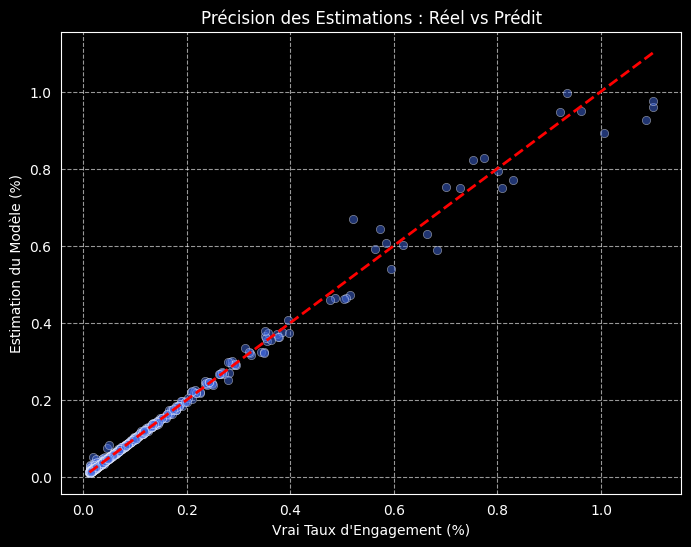

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Précision des Estimations : Réel vs Prédit")
plt.xlabel("Vrai Taux d'Engagement (%)")
plt.ylabel("Estimation du Modèle (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

Axes(0.125,0.11;0.775x0.77)


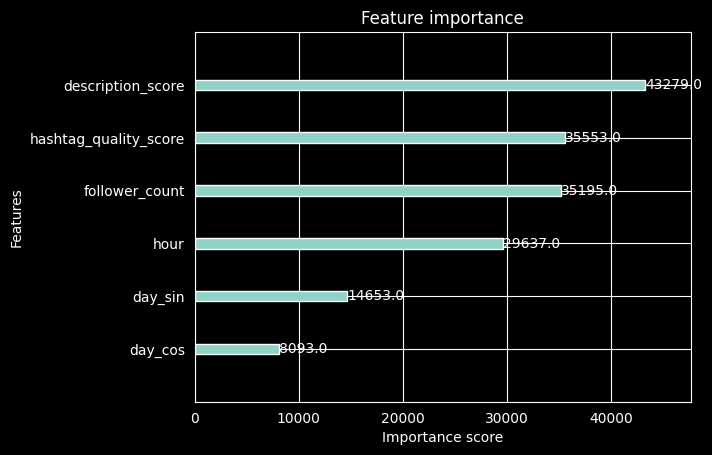

In [48]:
imp = xgb.plot_importance(model)
print(imp)

In [42]:
import joblib as jb
jb.dump(model, 'model_v5.pkl')
print('model_saved')

model_saved


In [43]:
X.columns

Index(['follower_count', 'hour', 'description_score', 'hashtag_quality_score',
       'day_sin', 'day_cos'],
      dtype='object')

In [44]:
concat = pd.concat(X , y)


TypeError: concat() takes 1 positional argument but 2 were given